In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../1d_fixed_beta/1d_fixed_results.csv')
df.head()

,n,contamination_level,ctam_sigma,ctam_mu,cook_cutoff,robust_m_est_bias,robust_m_est_variance,robust_mm_est_bias,robust_mm_est_variance,robust_s_est_bias,...,ols_mspe,robust_m_mspe,robust_mm_mspe,robust_s_mspe,ols_diag_mspe,ols_est_mse,robust_m_est_mse,robust_mm_est_mse,robust_s_est_mse,ols_diag_est_mse
0,50,0.0,0.1,-1.00,4,0.011094,0.022229,0.011483,0.023199,-0.001282,...,1.041672,1.045464,1.047194,1.117379,1.058208,0.020331,0.022241,0.023215,0.067885,0.033897
1,50,0.0,0.1,-0.50,4,0.003685,0.020065,0.004044,0.020236,0.002924,...,1.068021,1.070775,1.070109,1.135652,1.073408,0.019557,0.019978,0.020151,0.050805,0.023535
2,50,0.0,0.1,-0.25,4,0.001640,0.021389,0.002071,0.021910,0.007127,...,1.040903,1.041553,1.042056,1.123104,1.053032,0.021018,0.021285,0.021805,0.060313,0.026942
3,50,0.0,0.1,-0.10,4,-0.015783,0.021801,-0.014591,0.022071,-0.013986,...,1.043163,1.045125,1.045108,1.135000,1.057044,0.020069,0.021941,0.022174,0.076464,0.031633
4,50,0.0,0.1,0.00,4,0.000740,0.023344,0.000883,0.023387,0.008153,...,1.030282,1.032480,1.033350,1.131744,1.037081,0.022342,0.023228,0.023270,0.067257,0.028259


In [4]:
df.columns

Index(['n', 'contamination_level', 'ctam_sigma', 'ctam_mu', 'cook_cutoff',
       'robust_m_est_bias', 'robust_m_est_variance', 'robust_mm_est_bias',
       'robust_mm_est_variance', 'robust_s_est_bias', 'robust_s_est_variance',
       'ols_est_bias', 'ols_est_variance', 'ols_diag_est_bias',
       'ols_diag_est_variance', 'ols_mspe', 'robust_m_mspe', 'robust_mm_mspe',
       'robust_s_mspe', 'ols_diag_mspe', 'ols_est_mse', 'robust_m_est_mse',
       'robust_mm_est_mse', 'robust_s_est_mse', 'ols_diag_est_mse'],
      dtype='object')

In [5]:
feature_columns = ['n', 'contamination_level', 'ctam_sigma', 'ctam_mu', 'cook_cutoff']
mpse_columns = ['ols_mspe', 'robust_m_mspe', 'robust_mm_mspe', 'robust_s_mspe', 'ols_diag_mspe']
bias_columns = ['ols_est_bias', 'robust_m_est_bias', 'robust_mm_est_bias', 'robust_s_est_bias', 'ols_diag_est_bias']
variance_columns = ['ols_est_variance', 'robust_m_est_variance', 'robust_mm_est_variance', 'robust_s_est_variance', 'ols_diag_est_variance']
mse_columns = ['ols_est_mse', 'robust_m_est_mse', 'robust_mm_est_mse', 'robust_s_est_mse', 'ols_diag_est_mse']

In [6]:
# ploting for mpse, first melt the dataframe
df_mpse = df[feature_columns + mpse_columns]
df_mpse = df_mpse.melt(id_vars=feature_columns, value_vars=mpse_columns, var_name='method', value_name='mpse')
df_mpse['method'] = df_mpse['method'].str.replace('_mspe', '')
df_mpse.head()

,n,contamination_level,ctam_sigma,ctam_mu,cook_cutoff,method,mpse
0,50,0.0,0.1,-1.00,4,ols,1.041672
1,50,0.0,0.1,-0.50,4,ols,1.068021
2,50,0.0,0.1,-0.25,4,ols,1.040903
3,50,0.0,0.1,-0.10,4,ols,1.043163
4,50,0.0,0.1,0.00,4,ols,1.030282


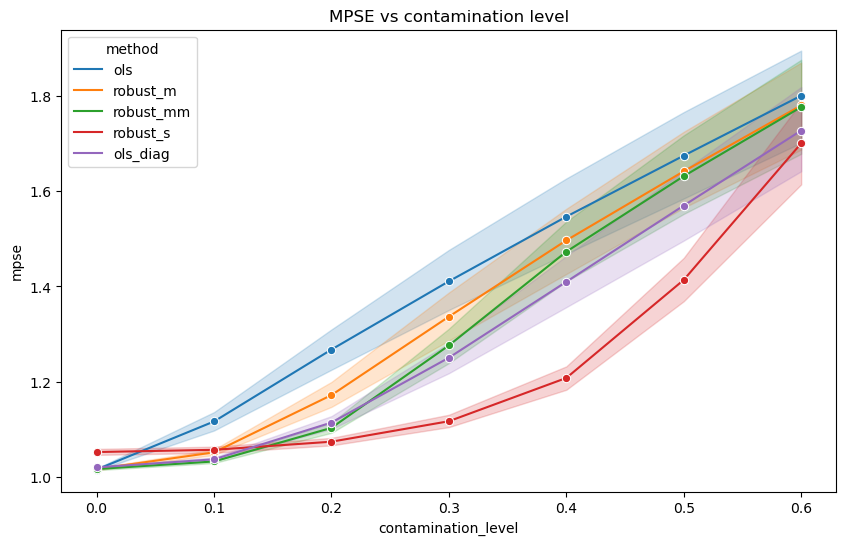

In [7]:
# plotting for mpse
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(data=df_mpse, x='contamination_level', y='mpse', hue='method', marker='o', ax=ax)
plt.title('MPSE vs contamination level')
plt.show()

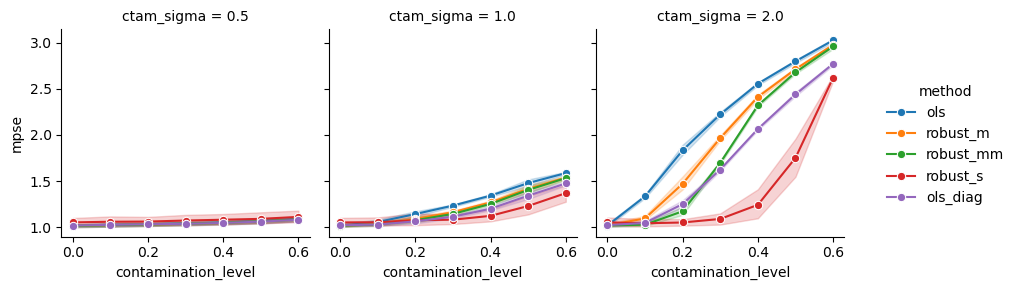

In [8]:
# Facet it by sigma, set mu = 0, sigma = 0.5, 1, 2
df_mpse_mu0_3sigma = df_mpse[(df_mpse['ctam_mu'] == 0) & (df_mpse['ctam_sigma'].isin([0.5, 1, 2]))]
g = sns.FacetGrid(df_mpse_mu0_3sigma, col='ctam_sigma', hue='method', margin_titles=True)
g.map(sns.lineplot, 'contamination_level', 'mpse', marker='o')
g.add_legend()
plt.show()

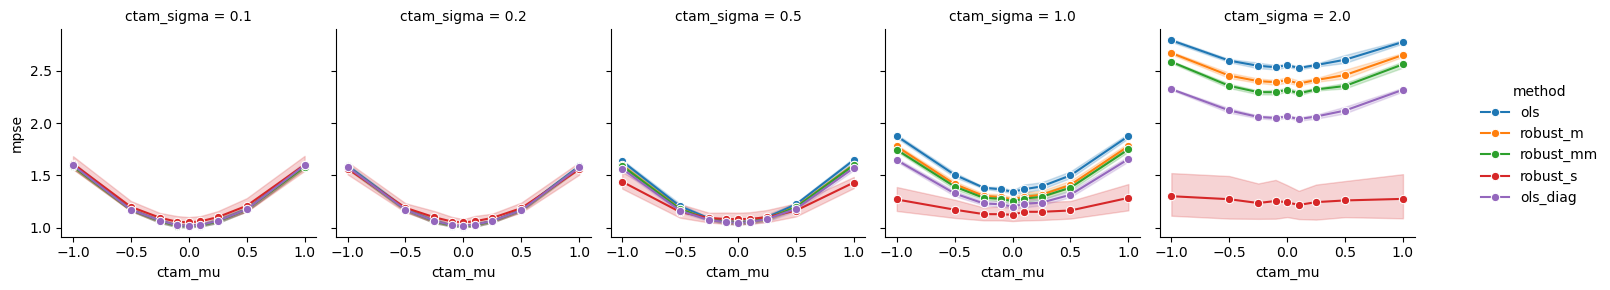

In [9]:
# fix contamination level = 0.4, check relationship between mpse and mu
df_mpse_contamination_04 = df_mpse[df_mpse['contamination_level'] == 0.4]
g = sns.FacetGrid(df_mpse_contamination_04, col='ctam_sigma', hue='method', margin_titles=True)
g.map(sns.lineplot, 'ctam_mu', 'mpse', marker='o')
g.add_legend()

In [10]:
df_bias = df[feature_columns + bias_columns]
df_bias = df_bias.melt(id_vars=feature_columns, value_vars=bias_columns, var_name='method', value_name='bias')
df_bias['method'] = df_bias['method'].str.replace('_est_bias', '')
df_bias['bias'] = df_bias['bias'].abs()
df_bias.head()

,n,contamination_level,ctam_sigma,ctam_mu,cook_cutoff,method,bias
0,50,0.0,0.1,-1.00,4,ols,0.013489
1,50,0.0,0.1,-0.50,4,ols,0.002826
2,50,0.0,0.1,-0.25,4,ols,0.002226
3,50,0.0,0.1,-0.10,4,ols,0.015877
4,50,0.0,0.1,0.00,4,ols,0.000439


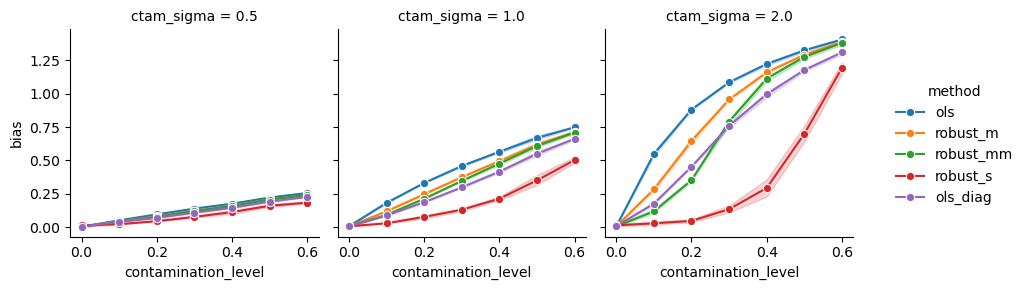

In [11]:
# bias plot faceted by  sigma, set mu = 0, sigma = 0.5, 1, 2
df_bias_mu0_3sigma = df_bias[(df_mpse['ctam_mu'] == 0) & (df_mpse['ctam_sigma'].isin([0.5, 1, 2]))]
g = sns.FacetGrid(df_bias_mu0_3sigma, col='ctam_sigma', hue='method', margin_titles=True)
g.map(sns.lineplot, 'contamination_level', 'bias', marker='o')
g.add_legend()
plt.show()

In [12]:
# variance plot faceted by  sigma, set mu = 0, sigma = 0.5, 1, 2
df_variance = df[feature_columns + variance_columns]
df_variance = df_variance.melt(id_vars=feature_columns, value_vars=variance_columns, var_name='method', value_name='variance')
df_variance['method'] = df_variance['method'].str.replace('_est_variance', '')
df_variance.head()


,n,contamination_level,ctam_sigma,ctam_mu,cook_cutoff,method,variance
0,50,0.0,0.1,-1.00,4,ols,0.020250
1,50,0.0,0.1,-0.50,4,ols,0.019648
2,50,0.0,0.1,-0.25,4,ols,0.021118
3,50,0.0,0.1,-0.10,4,ols,0.019917
4,50,0.0,0.1,0.00,4,ols,0.022454


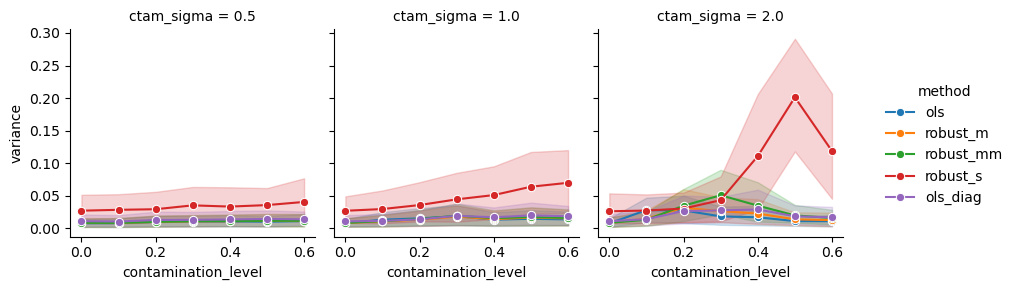

In [13]:
df_variance_mu0_3sigma = df_variance[(df_mpse['ctam_mu'] == 0) & (df_mpse['ctam_sigma'].isin([0.5, 1, 2]))]
g = sns.FacetGrid(df_variance_mu0_3sigma, col='ctam_sigma', hue='method', margin_titles=True)
g.map(sns.lineplot, 'contamination_level', 'variance', marker='o')
g.add_legend()
plt.show()


In [14]:
# mse plot faceted by  sigma, set mu = 0, sigma = 0.5, 1, 2
df_mse = df[feature_columns + mse_columns]
df_mse = df_mse.melt(id_vars=feature_columns, value_vars=mse_columns, var_name='method', value_name='mse')
df_mse['method'] = df_mse['method'].str.replace('_est_mse', '')
df_mse.head()


,n,contamination_level,ctam_sigma,ctam_mu,cook_cutoff,method,mse
0,50,0.0,0.1,-1.00,4,ols,0.020331
1,50,0.0,0.1,-0.50,4,ols,0.019557
2,50,0.0,0.1,-0.25,4,ols,0.021018
3,50,0.0,0.1,-0.10,4,ols,0.020069
4,50,0.0,0.1,0.00,4,ols,0.022342


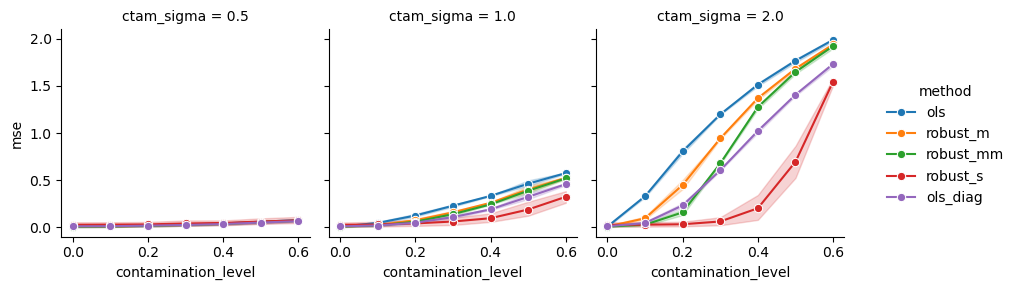

In [15]:
df_mse_mu0_3sigma = df_mse[(df_mse['ctam_mu'] == 0) & (df_mse['ctam_sigma'].isin([0.5, 1, 2]))]
g = sns.FacetGrid(df_mse_mu0_3sigma, col='ctam_sigma', hue='method', margin_titles=True)
g.map(sns.lineplot, 'contamination_level', 'mse', marker='o')
g.add_legend()
plt.show()

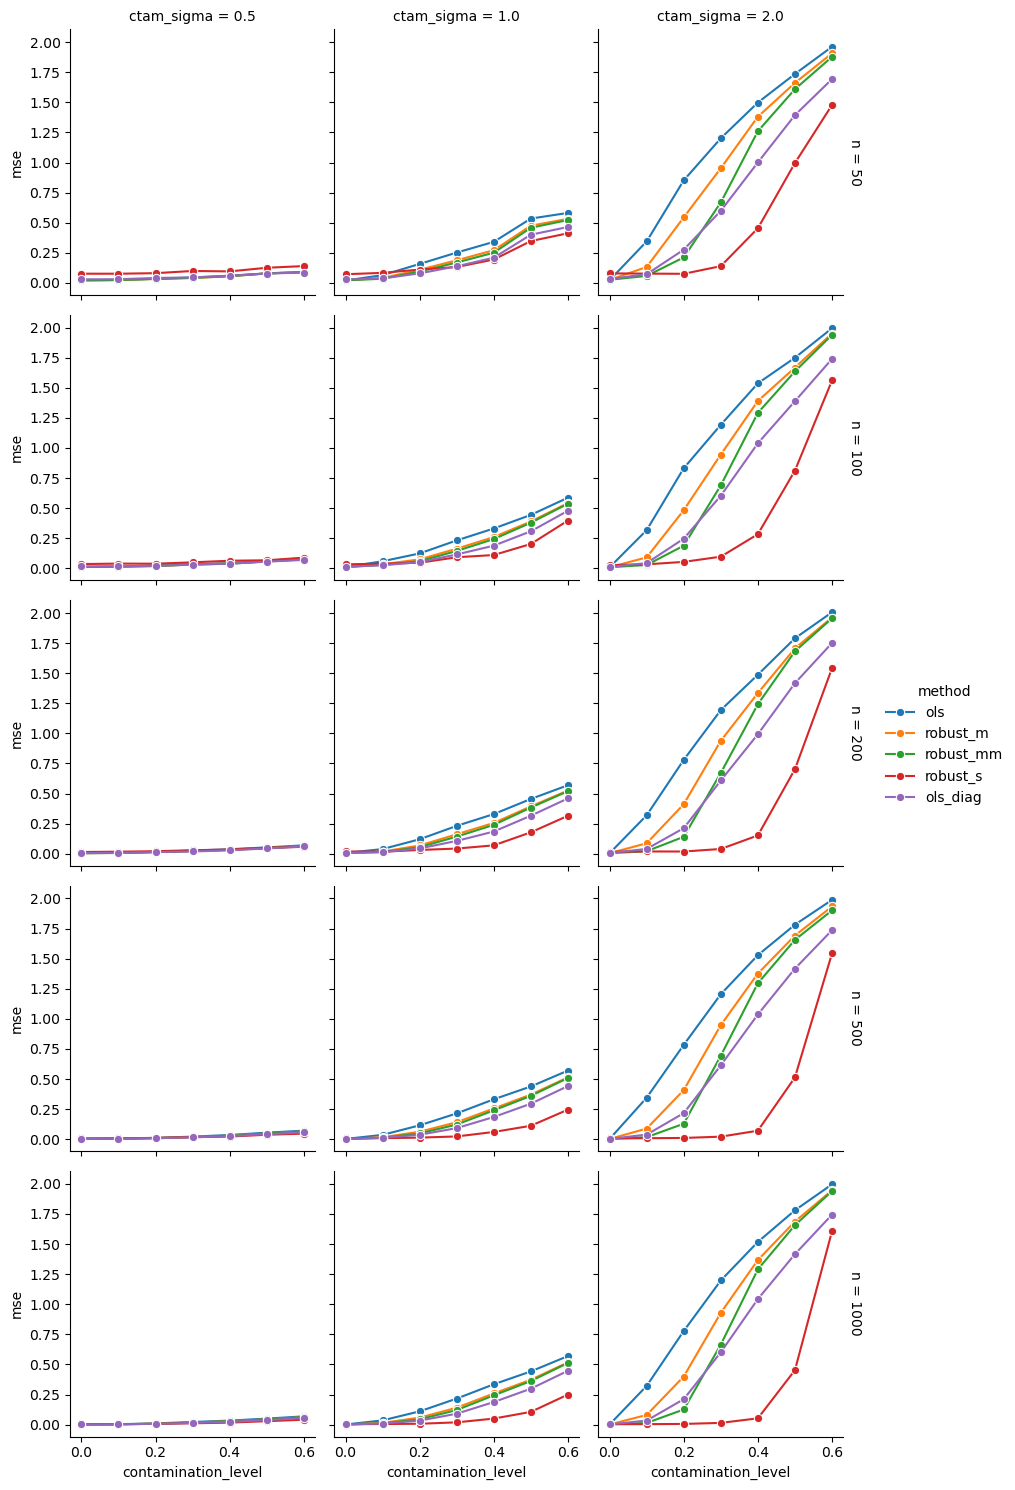

In [17]:
# set row facet tp n
g = sns.FacetGrid(df_mse_mu0_3sigma, col='ctam_sigma', row='n', hue='method', margin_titles=True)
g.map(sns.lineplot, 'contamination_level', 'mse', marker='o')
g.add_legend()
plt.show()